# Logistic Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from config import CONFIG

In [2]:
import sys
sys.path.insert(0, "../src")
from LogisticRegression import *

In [6]:
def main():
    N = 1000
    D = 2
    X0 = np.random.randn((N//2),D) + np.array([1, 1])
    X1 = np.random.randn((N//2),D) + np.array([-1, -1])
    X = np.vstack((X0, X1))
    
    y = np.array([0]*(N//2) + [1]*(N//2))
    
    plt.figure()
    plt.scatter(X[:,0], X[:,1], c = y, alpha = 0.5)
    plt.show()
    
    log_reg = LogisticRegression()
    log_reg.fit(X, y, eta = 1e-1, show_curve = True)
    y_hat = log_reg.predict(X)
    
    print(f"Training Accuracy: {accuracy(y, y_hat):0.4f}")
    
    x1 = np.linspace(X[:,0].min() - 1, X[:,0].max() + 1, 1000)
    x2 = -(log_reg.b/log_reg.w[1]) - (log_reg.w[0]/log_reg.w[1])*x1
    
    plt.figure()
    plt.scatter(X[:,0], X[:,1], c = y, alpha = 0.5)
    plt.plot(x1, x2, color = "#000000", linewidth = 2)
    plt.show()
    
    xx1, xx2 = np.meshgrid(x1, x1)
    Z = log_reg.predict(np.c_[xx1.ravel(),xx2.ravel()]).reshape(*xx1.shape)
    
    plt.figure()
    plt.pcolormesh(xx1, xx2, Z, cmap = cmap_light)
    plt.scatter(X[:,0], X[:,1], c = y, cmap = cmap_bold)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    plt.show()

In [3]:
from sklearn.datasets import load_iris

In [4]:
X, y = load_iris(return_X_y=True)
data = np.concatenate([X, y.reshape(-1,1)], axis=1)
X.shape, y.shape, data.shape

((150, 4), (150,), (150, 5))

In [9]:
mvLR = MVLogisticRegression()

In [11]:
mvLR.fit(X, y)

In [12]:
yhat = mvLR.predict(X)

In [14]:
np.mean(y==yhat.astype(float))

0.98

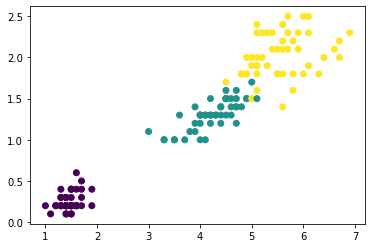

In [16]:
plt.scatter(data[:,2], data[:,3], c=yhat)